In [1]:
#Import the libraries
import math
#import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt#
plt.style.use('classic')
from datetime import datetime
from pandas_datareader import data as pdr
import yfinance as yf
import seaborn as sns
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates


c:\Users\ggarc\Desktop\TradigPython\venv\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [5]:
yf.pdr_override()
stock = 'NVDA'
historical_price = pdr.get_data_yahoo(stock, start = '2022-06-01', end=datetime.now(), interval="1h")  
#print(historical_price)
df=historical_price
df.head(20)
#df=df[:-1]
#print(df)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2022-06-01 09:30:00-04:00,187.240005,190.529999,185.690002,185.845001,185.845001,14388688
2022-06-01 10:30:00-04:00,185.820007,188.512802,184.350006,185.609894,185.609894,8998509
2022-06-01 11:30:00-04:00,185.630005,185.850006,181.220001,182.440002,182.440002,7445738
2022-06-01 12:30:00-04:00,182.440002,184.440002,181.994995,183.418701,183.418701,5436239
2022-06-01 13:30:00-04:00,183.460007,185.539993,182.720001,185.320007,185.320007,5526924
2022-06-01 14:30:00-04:00,185.339996,185.679993,183.550003,184.940002,184.940002,6141830
2022-06-01 15:30:00-04:00,184.919998,185.600006,182.940002,182.990005,182.990005,4075033
2022-06-02 09:30:00-04:00,182.919998,191.449997,181.979996,189.154007,189.154007,19658511
2022-06-02 10:30:00-04:00,189.169998,194.139999,188.779999,193.800003,193.800003,10168599
2022-06-02 11:30:00-04:00,193.830002,195.069702,192.990005,194.469894,194.469894,7683100


Grafico de Velas Japonesas

In [3]:

def velas_japonesas(df,index):
    stock_prices=df[index:]
    fig= plt.figure(figsize=(12,7))
    # "up" dataframe will store the stock_prices when the closing stock price is greater than or equal to the opening stock prices
    up = stock_prices[stock_prices.Close >= stock_prices.Open]

    # "down" dataframe will store the stock_prices when the closing stock price is lesser than the opening stock prices
    down = stock_prices[stock_prices.Close < stock_prices.Open]

    # When the stock prices have decreased, then it will be represented by red color candlestick
    col1 = 'green'

    # When the stock prices have increased, then it  will be represented by green color candlestick
    col2 = 'red'


    # Setting width of candlestick elements
    width = .3
    width2 = .03   
    # Plotting up prices of the stock
    plt.bar(up.index, up.Close-up.Open, width, bottom=up.Open, color=col1)
    plt.bar(up.index, up.High-up.Close, width2, bottom=up.Close, color=col1)
    plt.bar(up.index, up.Low-up.Open, width2, bottom=up.Open, color=col1)
    
    # Plotting down prices of the stock
    plt.bar(down.index, down.Close-down.Open, width, bottom=down.Open, color=col2)
    plt.bar(down.index, down.High-down.Open, width2, bottom=down.Open, color=col2)
    plt.bar(down.index, down.Low-down.Close, width2, bottom=down.Close, color=col2)
    plt.title('Grafico de Velas Japonesas', fontsize=25)
    
    # rotating the x-axis tick labels at 30degree towards right
    plt.xticks(rotation=30, ha='right')
    plt.xlabel('Date',fontsize=18)
    plt.ylabel('Close Price in USD',fontsize=18)
    plt.grid(color='grey', linestyle='dotted', linewidth=1.5)
    plt.show()

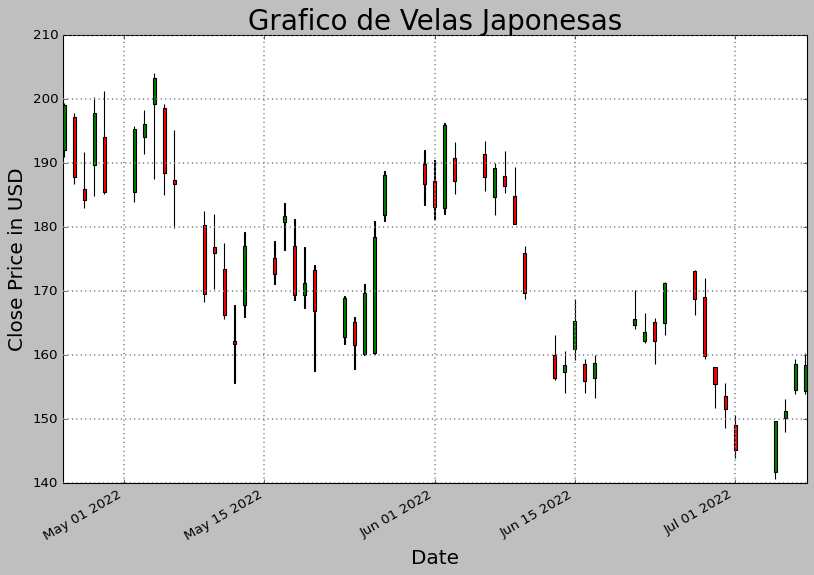

In [4]:
index='2022-04-25'
velas_japonesas(df,index)

CALCULO DEL INTERES O FUERZA DE OFERTA O DEMANDA

In [5]:
cierre = df['Close']
velocidad = cierre.diff()
aceleracion = velocidad.diff()

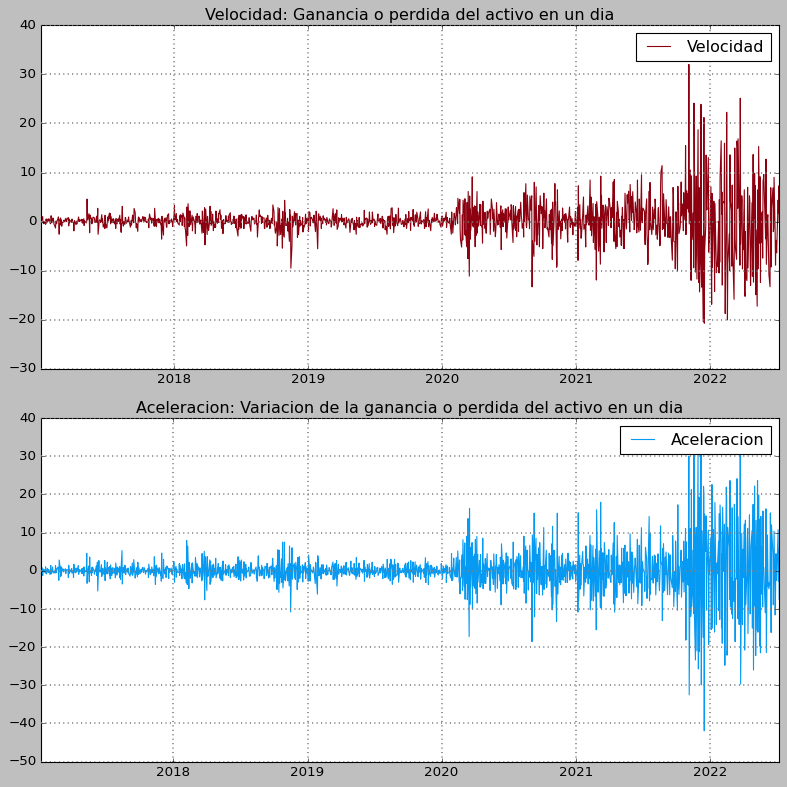

In [6]:
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
ax1.plot(velocidad, label='Velocidad',color='#8C000F') #Crimson
ax1.legend()
ax1.set_title('Velocidad: Ganancia o perdida del activo en un dia')
ax1.grid(color='grey', linestyle='dotted', linewidth=1.5)

ax2.plot(aceleracion, label='Aceleracion',color='#069AF3') #Azure
ax2.set_title('Aceleracion: Variacion de la ganancia o perdida del activo en un dia')
ax2.legend()
ax2.grid(color='grey', linestyle='dotted', linewidth=1.5)
fig.tight_layout()
plt.show()



        **ANALSIS DE LA VELOCIDAD Y ACELERACION**   
Como se puede ver en el grafico, las oscilaciones de la aceleracion  y velocidad se incrementan a paertir de finales del 2021 y continuan por 2022. Esto me quisiera decir que existe un mayor movimiento en los precios que años anteriores, o existe mas volatilidad que antes.

In [7]:
volumen = df['Volume']

FUERZA = MASA * ACELERACION 



INTERES = VOLUMEN DE TRANSACCIONES * ACELERACION DEL CAMBIO DE PRECIO


In [8]:
fuerza = volumen * aceleracion
#print(fuerza)

In [9]:
def graficar_fuerza(fuerza,index):
    fuerza=fuerza[index:]
    fig1 = plt.figure(figsize=(13,5))
    ax = fig1.add_axes([0,0,1,1])
    ax.plot(fuerza,color='black',marker='o',markersize=4,markerfacecolor='red')
    ax.set_title('INTERES DE OFERTA O DEMANDA',fontsize=20,color='black')
    plt.xticks(rotation=30, ha='right')
    plt.xlabel('Date',fontsize=18)
    plt.ylabel('Close Price in USD',fontsize=18)
    plt.grid(color='grey', linestyle='dotted', linewidth=1.5)
    
    plt.show()

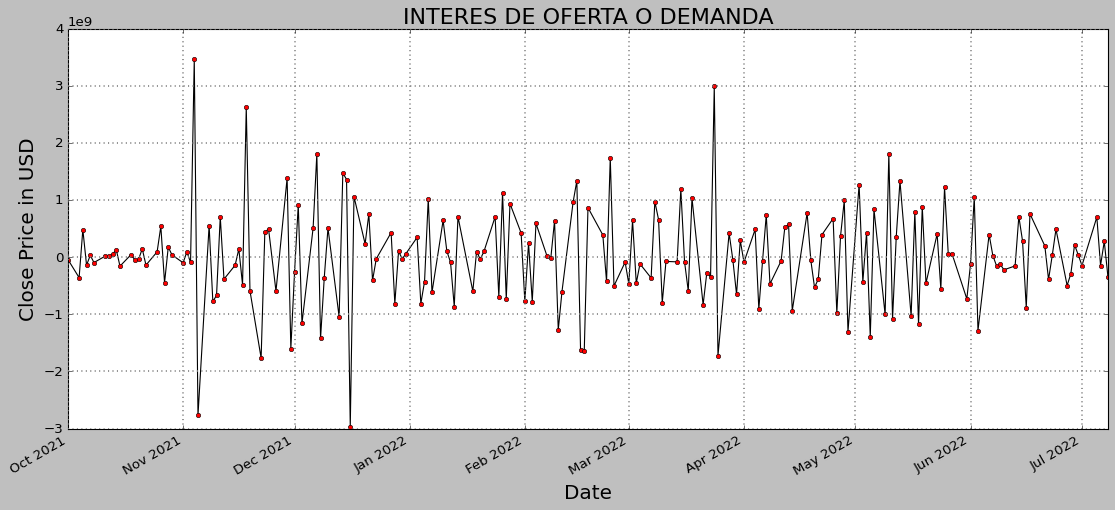

In [10]:
index='2021-10-01'
graficar_fuerza(fuerza,index)

Este grafico me muestra que la accion de NVDA desde el ultimo año ha tenido muchisima fuerza, mas que en los anteriores años, esta fuerza indicaria que existe interes en la ofera y demanda de este activo. La fuerza en sus mayores numeros nos indicarian que existe una mayor probabilidad de que el precio rompa la resistencia o soporte en nuestra estructura de precio.

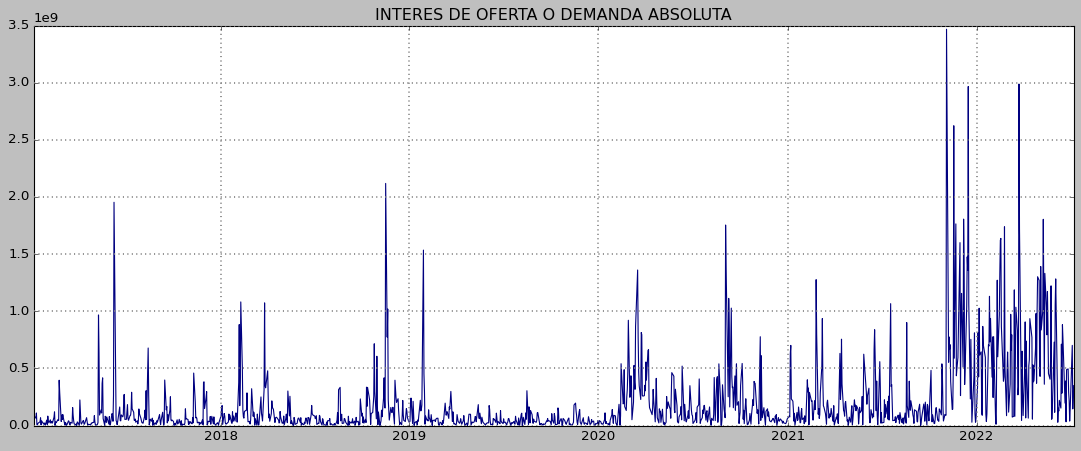

In [11]:
fuerza_absoluta = fuerza.abs()
fig2 = plt.figure(figsize=(13,5))
ax2 = fig2.add_axes([0,0,1,1])
ax2.plot(fuerza_absoluta, label='Fuerza',color='#000080')
ax2.set_title('INTERES DE OFERTA O DEMANDA ABSOLUTA')
plt.grid(color='grey', linestyle='dotted', linewidth=1.5)
plt.show()

SE HACE EL PROCESO DEL ZOOM A LA PARTE DE INTERES 

In [12]:
def zoom_fecha(data,index):
    def cut_data_by_index(data, index):
        return data[index:]
    data_actual = cut_data_by_index(fuerza_absoluta, fecha)
    fig3 = plt.figure(figsize=(13,5))
    ax3 = fig3.add_axes([0,0,1,1])
    ax3.plot(data_actual, label='Fuerza',color='black',marker='o',markersize=4,markerfacecolor='red') #Cada marcador representa un punto estructural en el interes absoluto que me indica que el activo tiene o no tiene interes en la temporalidad descrita
    ax3.set_title('INTERES o FUERZA ABSOLUTA')
    fig3.tight_layout()
    plt.grid(color='grey', linestyle='dotted', linewidth=1.5)
    plt.show()

C:\Users\ggarc\AppData\Local\Temp\ipykernel_16048\3823681450.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig3.tight_layout()


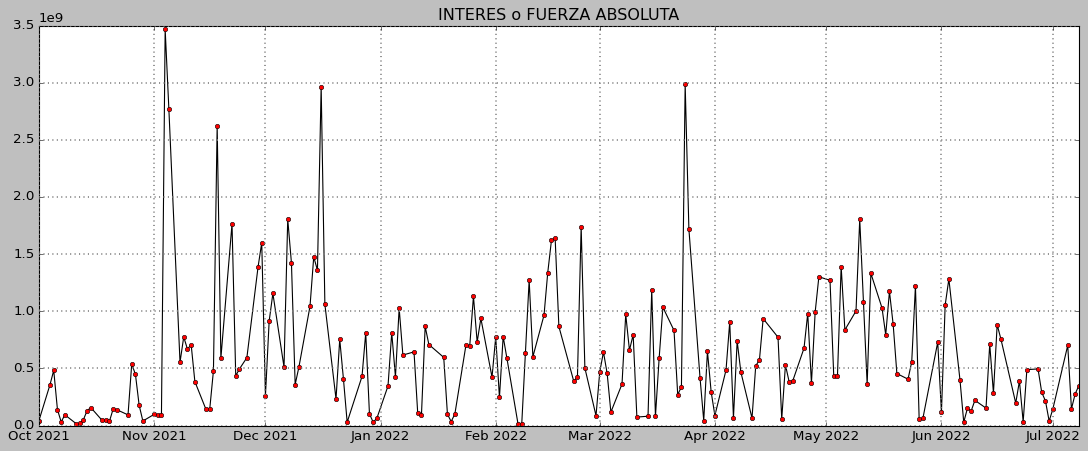

In [13]:
fecha='2021-10-01'
zoom_fecha(fuerza_absoluta, fecha)

Un Interes fuerte como se ve en la grafica (>=2) puede significar una alerta de que hay interes suficiente para tumbar o hacer crecer el precio. En este caso el pico del Interes en Mar 24 indico que el precio va a crecer hasta su correccion que empezo el 30 Marzo. Es decir mandaron el precio con fuerza y reboto en los siguientes niveles fibonacci.

Un analisis rapido de lo que significa la fuerza o interes absoluto es que puede indentificar movimientos bruscos y cambios de tendencia en el precio, ya que tenemos 2 valores:

    *La masa: El volumen de transacciones (Mientras mas elevado el numero significa que hay mas interes de que suba o baje el precio)
    *La aceleracion: La variacion de la variacion del precio o segunda derivada del precio con respecto al tiempo (Mientras mas elevado el numero significa que se ha desplazado mas el precio en el tiempo es decir ha subido o bajado el precio)

Con estas observaciones se puede decir que:

    * Si masa > aceleracion: Quiere decir que hubo un mayor numero de transacciones, indicando que hay interes que el activo suba o baje de precio antes que haber movimientos fuertes (desplazamiento para arriba o abajo). Puedes seguir una estrategia centrada en el numero de transacciones o volumen
    * Si aceleracion > masa: Quiere decir que hubo desplazamientos mas fuertes en el precio que haber un mayor numero de transacciones. Puedes seguir una estrategia donde proyectes el desplazamiento fuerte del precio sea arriba o abajo y operar estos desplazamientos en mayor medida. 

In [14]:
def grafica_del_volumen(data):
    fig4 = plt.figure(figsize=(13,5))

In [15]:
grafica_del_volumen(volumen)

<Figure size 1040x400 with 0 Axes>

In [16]:
def zoom_volumen(data,index):
    df=volumen[index:]
    fig = plt.figure(figsize=(13,5))
    ax = fig.add_axes([0,0,1,1])
    ax.plot(df, color='#000080',marker='o',markersize=4,markerfacecolor='red')
    ax.set_title(' VOLUMEN')
    fig.tight_layout()
    plt.grid(color='grey', linestyle='dotted', linewidth=1.5)
    plt.show()   

C:\Users\ggarc\AppData\Local\Temp\ipykernel_16048\2359944415.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


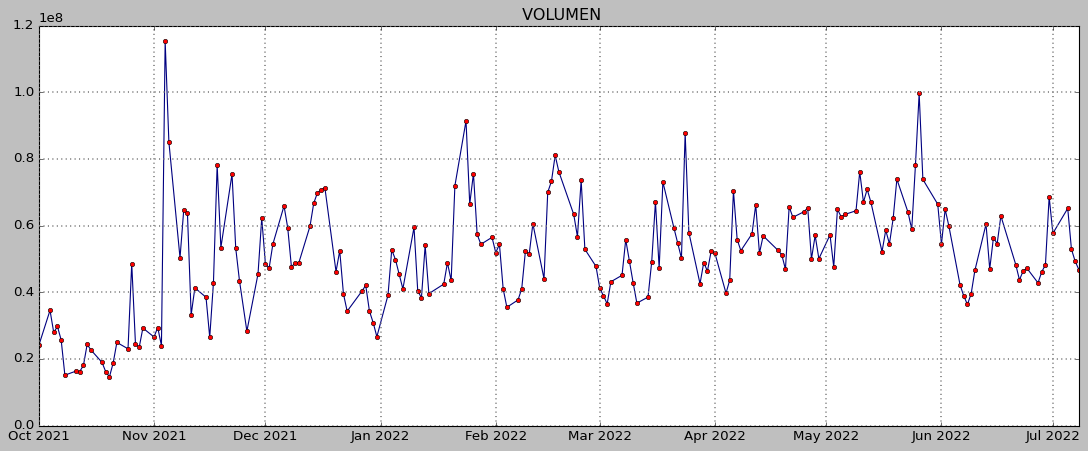

In [17]:
index='2021-10-01'
zoom_volumen(volumen, index)


C:\Users\ggarc\AppData\Local\Temp\ipykernel_16048\2359944415.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


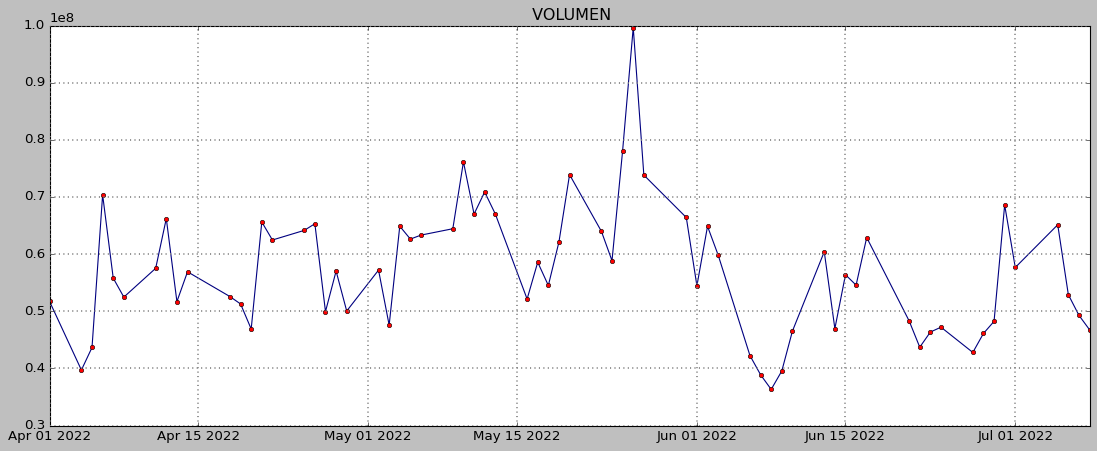

In [18]:
index='2022-04-01'
zoom_volumen(volumen, index)

MOVING AVERAGE

In [19]:
def moving_average(data):
    ma20 = cierre.rolling(window=20).mean() #Amarillo
    ma50 = cierre.rolling(window=50).mean() #Azul
    ma200 = cierre.rolling(window=200).mean()  #Rojo
    return ma20, ma50, ma200


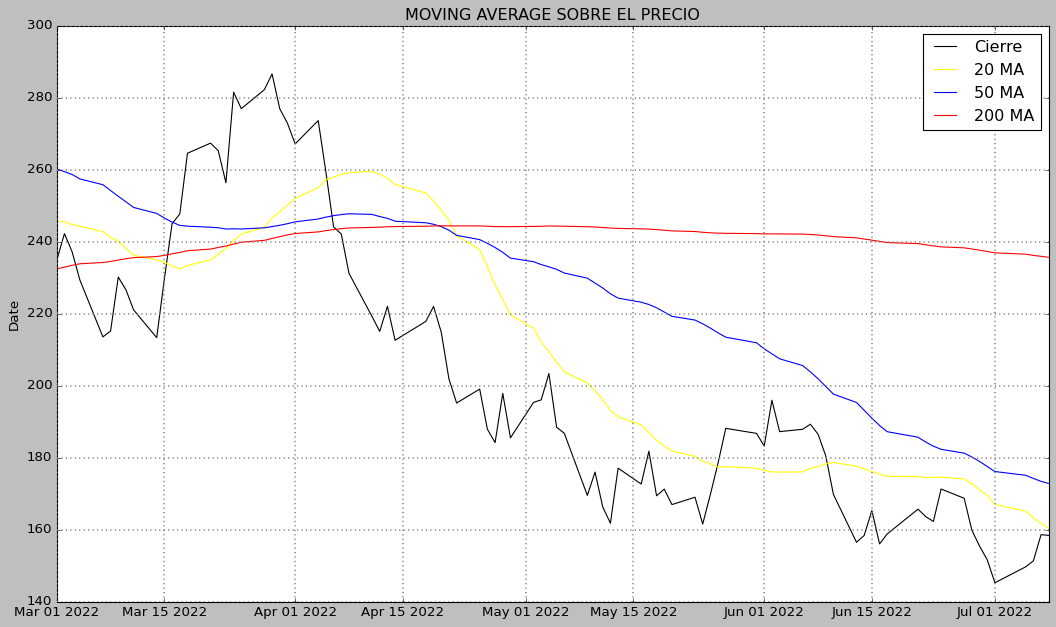

In [20]:
index = '2022-03-01'
data=cierre[index:]
ma20, ma50, ma200 = moving_average(data)
ma20=ma20[index:]
ma50=ma50[index:]
ma200=ma200[index:]

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(data, label='Cierre',color='black')
ax.plot(ma20, label='20 MA',color='yellow')
ax.plot(ma50, label='50 MA',color='blue')
ax.plot(ma200, label='200 MA',color='red')
ax.set_title('MOVING AVERAGE SOBRE EL PRECIO')
ax.set_ylabel('Price in $')
ax.set_ylabel('Date')
ax.legend(loc='best')
plt.grid(color='grey', linestyle='dotted', linewidth=1.5)
plt.show()

EXPONTENTIAL MOVING AVERAGE

In [21]:
m_ema=[5,10,20]

In [22]:
def exponential_moving_average(data,m_ema):
    ema20 = cierre.ewm(span=m_ema[0], adjust=False).mean() #Amarillo
    ema50 = cierre.ewm(span=m_ema[1], adjust=False).mean() #Azul
    ema200 = cierre.ewm(span=m_ema[2], adjust=False).mean() #Rojo
    return ema20, ema50, ema200


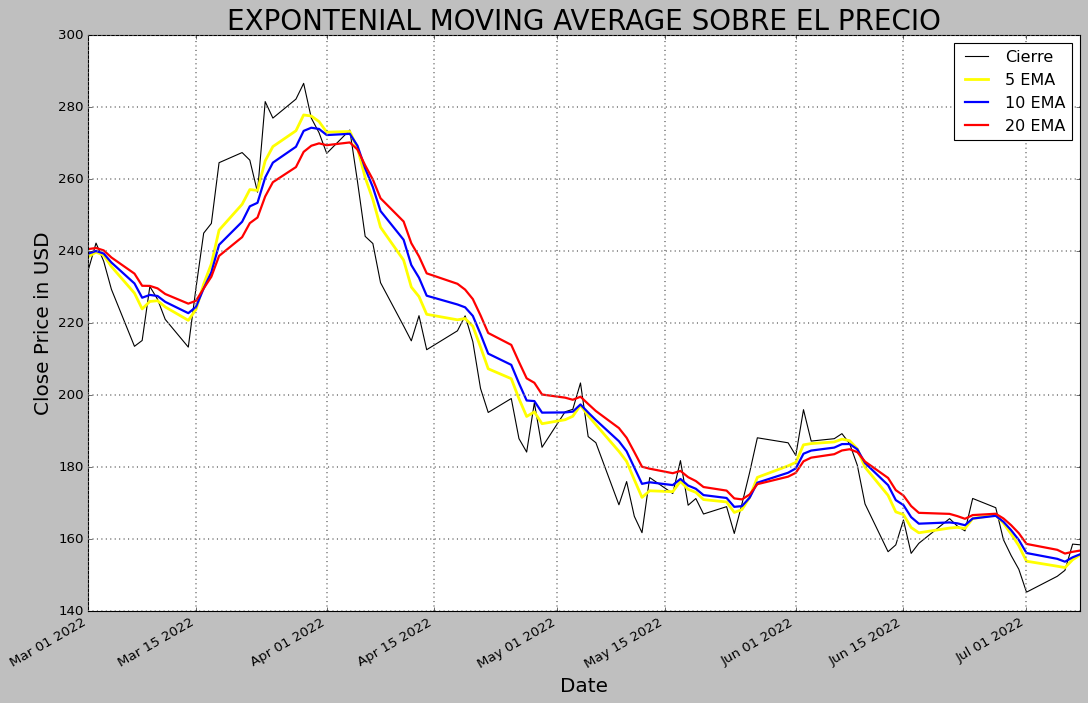

In [23]:
index = '2022-03-01'
m_ema=[5,7,10]

data=cierre[index:]
ema20, ema50, ema200 = exponential_moving_average(data,m_ema)
ema20=ema20[index:]
ema50=ema50[index:]
ema200=ema200[index:]

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(data, label='Cierre',color='black')
ax.plot(ema20, label='5 EMA',color='yellow',linewidth=2.5)
ax.plot(ema50, label='10 EMA',color='blue',linewidth=2)
ax.plot(ema200, label='20 EMA',color='red',linewidth=2)
ax.set_title('EXPONTENIAL MOVING AVERAGE SOBRE EL PRECIO',fontsize=25)
ax.set_ylabel('Price in $')
ax.set_ylabel('Date')
ax.legend(loc='best')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price in USD',fontsize=18)
plt.grid(color='grey', linestyle='dotted', linewidth=1.5)
plt.show()

La conlfuencia de las 3 mismas lineas y el cambio de tendencia indican que el precio va a subir/bajar drasticamente

DETECTAR PUNTOS DE CRUCE EN LOS EMA

In [24]:
index = '2022-03-01'
m_ema=[5,10,20]

data=cierre[index:]
ema5, ema10, ema20 = exponential_moving_average(data,m_ema)
ema5=ema20[index:]
ema10=ema50[index:]
ema20=ema200[index:]

Date
2022-03-01    5.015152
2022-03-02    4.083504
2022-03-03    4.137182
2022-03-04    5.279150
2022-03-07    8.379790
                ...   
2022-07-01    8.520477
2022-07-05    8.709408
2022-07-06    8.373339
2022-07-07    6.819260
2022-07-08    5.633296
Name: Close, Length: 90, dtype: float64


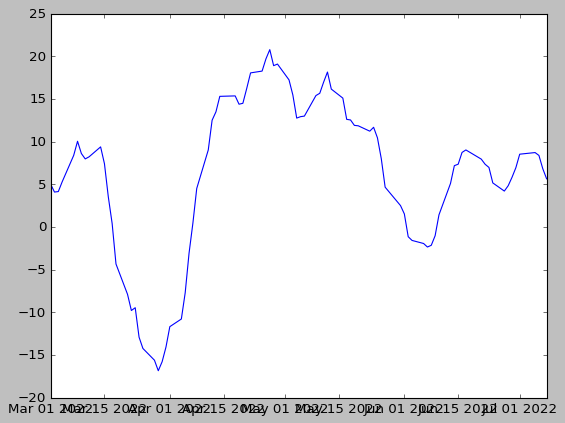

In [25]:
distancia_cruce_azul_amarillo = ema5-ema10
print(distancia_cruce_azul_amarillo)
plt.plot(distancia_cruce_azul_amarillo)


Los puntos en 0 indican que se cortaron las lineas indicando la primera pista para el cambio de tendencia el primero en mediandos marzo 2022 es de un precio positivo a un negativo indicando el cambio de tendencia hacia una tendencia alcista, mientras que terminando abril 2022 el ema5 y ema10 se cruzan de un numero negativo a un positivo indicando un cambio a una tendencia bajista. La imagen en trading view tambien lo confirma.

! [Imagen] (~ \rsi_formula.jpg)

Con los coeficientes M del M-EMA se puede ir ajustando los mejores parametros para que el precio y las emas puedan proyectar un cambio de tendencia. Como se puede ver con 5,10,20 de ema se ajusta bien al grafico de NVDA

FIBONACCI RETRACEMENT

In [26]:
#Calculate the max and min close price
maximum_price = 43 #df['Close'].max()
minimum_price = 327 #df['Close'].min()
difference = maximum_price - minimum_price #Get the difference        
first_level = maximum_price - difference * 0.236   
second_level = maximum_price - difference * 0.382  
third_level = maximum_price - difference * 0.5     
fourth_level = maximum_price - difference * 0.618  

In [27]:
#Print the price at each level
print("Level Percentage\t", "Price ($)")
print("00.0%\t\t", maximum_price)
print("23.6%\t\t", first_level)
print("38.2%\t\t", second_level)
print("50.0%\t\t", third_level)
print("61.8%\t\t", fourth_level)
print("100.0%\t\t", minimum_price)

Level Percentage	 Price ($)
00.0%		 43
23.6%		 110.024
38.2%		 151.488
50.0%		 185.0
61.8%		 218.512
100.0%		 327


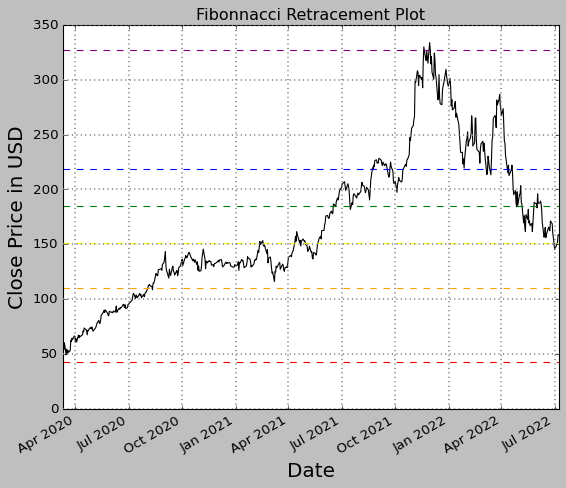

In [28]:
index='2020-03-10'
df=df[index:]
plt.title('Fibonnacci Retracement Plot')
plt.plot(df.index, df['Close'],color='black')
plt.axhline(maximum_price, linestyle='dashed', alpha=1, color = 'red')
plt.axhline(first_level, linestyle='dashed', alpha=1, color = 'orange')
plt.axhline(second_level, linestyle='dashed', alpha=1, color = 'yellow')
plt.axhline(third_level, linestyle='dashed', alpha=1, color = 'green')
plt.axhline(fourth_level, linestyle='dashed', alpha=1, color = 'blue')
plt.axhline(minimum_price, linestyle='dashed', alpha=1, color = 'purple')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price in USD',fontsize=18)
plt.xticks(rotation=30, ha='right')
plt.grid(color='grey', linestyle='dotted', linewidth=1.5)
plt.show()

RSI PANDAS

In [29]:
price=df['Close']
df['Price Diff'] = price.diff(1)
df.head(200)
#Puede servir para tener otro marco de trabajo
data = df[['Close','Price Diff']]
print(data)

                 Close  Price Diff
Date                              
2020-03-10   65.269997         NaN
2020-03-11   61.617500   -3.652496
2020-03-12   54.077499   -7.540001
2020-03-13   60.209999    6.132500
2020-03-16   49.099998  -11.110001
...                ...         ...
2022-07-01  145.229996   -6.360001
2022-07-05  149.639999    4.410004
2022-07-06  151.300003    1.660004
2022-07-07  158.580002    7.279999
2022-07-08  158.380005   -0.199997

[588 rows x 2 columns]


C:\Users\ggarc\AppData\Local\Temp\ipykernel_16048\672361044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Diff'] = price.diff(1)


In [30]:
data['gain'] = data['Price Diff'].clip(lower=0).round(2)
data['loss'] = data['Price Diff'].clip(upper=0).abs().round(2)
print(data)
data.columns

                 Close  Price Diff  gain   loss
Date                                           
2020-03-10   65.269997         NaN   NaN    NaN
2020-03-11   61.617500   -3.652496  0.00   3.65
2020-03-12   54.077499   -7.540001  0.00   7.54
2020-03-13   60.209999    6.132500  6.13   0.00
2020-03-16   49.099998  -11.110001  0.00  11.11
...                ...         ...   ...    ...
2022-07-01  145.229996   -6.360001  0.00   6.36
2022-07-05  149.639999    4.410004  4.41   0.00
2022-07-06  151.300003    1.660004  1.66   0.00
2022-07-07  158.580002    7.279999  7.28   0.00
2022-07-08  158.380005   -0.199997  0.00   0.20

[588 rows x 4 columns]


C:\Users\ggarc\AppData\Local\Temp\ipykernel_16048\2388893238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gain'] = data['Price Diff'].clip(lower=0).round(2)
C:\Users\ggarc\AppData\Local\Temp\ipykernel_16048\2388893238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loss'] = data['Price Diff'].clip(upper=0).abs().round(2)


Index(['Close', 'Price Diff', 'gain', 'loss'], dtype='object')

In [31]:

window_length=14

In [32]:
# Get initial Averages
data['avg_gain'] = data['gain'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
data['avg_loss'] = data['loss'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]

C:\Users\ggarc\AppData\Local\Temp\ipykernel_16048\1687882665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avg_gain'] = data['gain'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
C:\Users\ggarc\AppData\Local\Temp\ipykernel_16048\1687882665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avg_loss'] = data['loss'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]


In [33]:
data.head(200)

,Close,Price Diff,gain,loss,avg_gain,avg_loss
Date,,,,,,
2020-03-10,65.269997,NaN,NaN,NaN,NaN,NaN
2020-03-11,61.617500,-3.652496,0.00,3.65,NaN,NaN
2020-03-12,54.077499,-7.540001,0.00,7.54,NaN,NaN
2020-03-13,60.209999,6.132500,6.13,0.00,NaN,NaN
2020-03-16,49.099998,-11.110001,0.00,11.11,NaN,NaN
...,...,...,...,...,...,...
2020-12-15,133.604996,0.517502,0.52,0.00,NaN,NaN
2020-12-16,132.425003,-1.179993,0.00,1.18,NaN,NaN
2020-12-17,133.412506,0.987503,0.99,0.00,NaN,NaN


In [34]:
print(data.iloc[window_length-1: window_length+2])

                Close  Price Diff  gain  loss  avg_gain  avg_loss
Date                                                             
2020-03-27  63.182499   -1.127499  0.00  1.13       NaN       NaN
2020-03-30  66.397499    3.215000  3.22  0.00     2.205  2.124286
2020-03-31  65.900002   -0.497498  0.00  0.50       NaN       NaN


In [35]:
# Get WMS averages
# Average Gains
for i, row in enumerate(data['avg_gain'].iloc[window_length+1:]):
    data['avg_gain'].iloc[i + window_length + 1] =\
        (data['avg_gain'].iloc[i + window_length] *
         (window_length - 1) +
         data['gain'].iloc[i + window_length + 1])\
        / window_length

C:\Users\ggarc\AppData\Local\Temp\ipykernel_16048\2099560757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avg_gain'].iloc[i + window_length + 1] =\


In [36]:
# Average Losses
for i, row in enumerate(data['avg_loss'].iloc[window_length+1:]):
    data['avg_loss'].iloc[i + window_length + 1] =\
        (data['avg_loss'].iloc[i + window_length] *
         (window_length - 1) +
         data['loss'].iloc[i + window_length + 1])\
        / window_length

C:\Users\ggarc\AppData\Local\Temp\ipykernel_16048\291413631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avg_loss'].iloc[i + window_length + 1] =\


In [37]:
print(df[window_length-1:window_length+5])

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2020-03-27  62.500000  65.779999  62.169998  63.182499  63.036995  63882800   
2020-03-30  63.840000  66.489998  63.397499  66.397499  66.244591  60225200   
2020-03-31  66.800003  68.849998  64.437500  65.900002  65.748238  94996000   
2020-04-01  63.912498  65.382500  60.320000  60.767502  60.627560  65691200   
2020-04-02  61.060001  64.000000  60.577499  63.867500  63.720421  67576400   
2020-04-03  63.490002  63.907501  59.597500  60.977501  60.837074  66321200   

            Price Diff  
Date                    
2020-03-27   -1.127499  
2020-03-30    3.215000  
2020-03-31   -0.497498  
2020-04-01   -5.132500  
2020-04-02    3.099998  
2020-04-03   -2.889999  


Este dataframe puede ser interesante ya que tiene los valores de las ganancias y las perdidas y si no hubo perdidas pone cero y si hubo pone el valor

In [38]:
data['rs'] = data['avg_gain'] / data['avg_loss']

In [39]:
# Calculate RSI
data['rsi'] = 100 - (100 / (1.0 + data['rs']))
# View Result
data.head(100)

,Close,Price Diff,gain,loss,avg_gain,avg_loss,rs,rsi
Date,,,,,,,,
2020-03-10,65.269997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-11,61.617500,-3.652496,0.00,3.65,NaN,NaN,NaN,NaN
2020-03-12,54.077499,-7.540001,0.00,7.54,NaN,NaN,NaN,NaN
2020-03-13,60.209999,6.132500,6.13,0.00,NaN,NaN,NaN,NaN
2020-03-16,49.099998,-11.110001,0.00,11.11,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-07-24,101.945000,0.647499,0.65,0.00,1.053429,0.797120,1.321543,56.925209
2020-07-27,104.214996,2.269997,2.27,0.00,1.140327,0.740183,1.540601,60.639237
2020-07-28,102.154999,-2.059998,0.00,2.06,1.058875,0.834456,1.268941,55.926575


In [40]:
def graficar_rsi(data,index):
    data=data[index:]
    data.plot(y=['rsi'], color=['black'], linewidth=2.0,marker='o',markersize=4,markerfacecolor='red')
    plt.xlabel('Date',fontsize=18)
    plt.ylabel('Relative Strength Index',fontsize=18)
    plt.xticks(rotation=30, ha='right')
    plt.grid(color='grey', linestyle='dotted', linewidth=1.5)
    plt.legend(loc='best')
    plt.show()
    

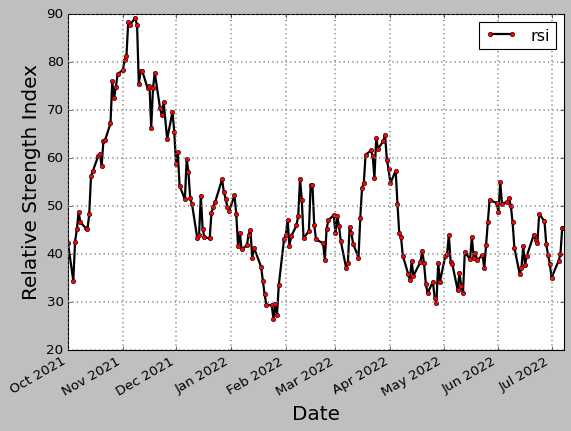

In [41]:
graficar_rsi(data,'2021-10-01')

In [42]:
def graficar_rsi2(rsi,index):
    rsi=rsi[index:]
    fig= plt.figure(figsize=(13,5))
    ax = fig.add_axes([0,0,1,1])
    ax.plot(rsi,color='black',marker='o',markersize=4,markerfacecolor='red')
    ax.set_title('Indice de Fuerza Relativa',fontsize=20,color='black')
    ax.axhline(100, linestyle='dashed', alpha=1, color = 'red')
    ax.axhline(70, linestyle='dashed',label ='Sobre Comprado', alpha=1, color = 'red')
    ax.axhline(30, linestyle='dashed',label ='Sobre Vendido', alpha=1, color = 'blue')
    ax.axhline(10, linestyle='dashed', alpha=1, color = 'blue')
    plt.xticks(rotation=30, ha='right')
    plt.xlabel('Date',fontsize=18)
    plt.ylabel('Porcentaje',fontsize=18)
    plt.grid(color='grey', linestyle='dotted', linewidth=1.5)
    plt.legend(loc='best')
    plt.show()

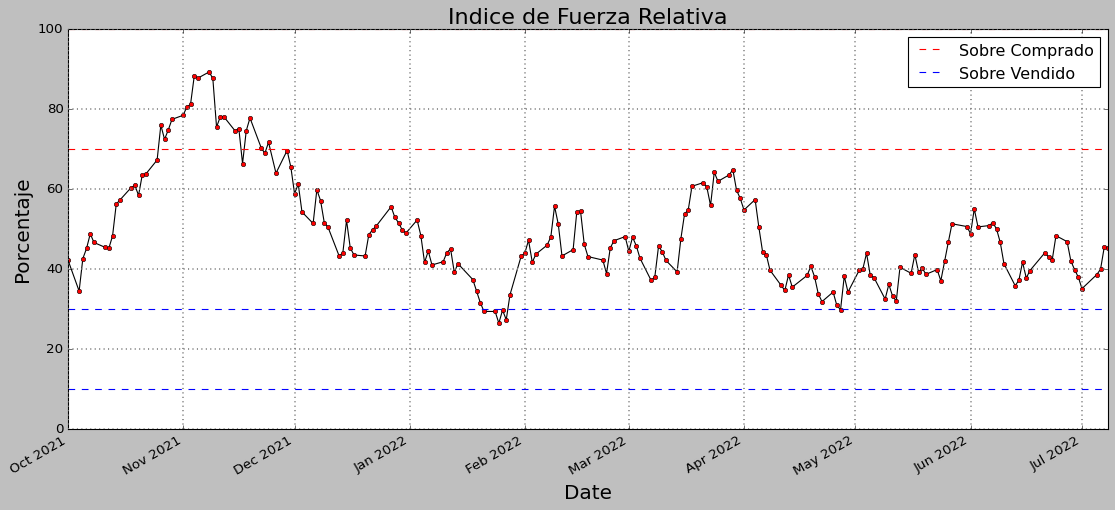

In [43]:
rsi=data['rsi']
graficar_rsi2(rsi,'2021-10-01')

In [1]:


def velas_japonesas(stock_prices):
    fig= plt.figure(figsize=(12,7))
    # "up" dataframe will store the stock_prices when the closing stock price is greater than or equal to the opening stock prices
    up = stock_prices[stock_prices.Close >= stock_prices.Open]
    # "down" dataframe will store the stock_prices when the closing stock price is lesser than the opening stock prices
    down = stock_prices[stock_prices.Close < stock_prices.Open]
    # When the stock prices have decreased, then it will be represented by red color candlestick
    col1 = 'green'
    # When the stock prices have increased, then it  will be represented by green color candlestick
    col2 = 'red'

    # Setting width of candlestick elements
    width = .3
    width2 = .03   
    # Plotting up prices of the stock
    plt.bar(up.index, up.Close-up.Open, width, bottom=up.Open, color=col1)
    plt.bar(up.index, up.High-up.Close, width2, bottom=up.Close, color=col1)
    plt.bar(up.index, up.Low-up.Open, width2, bottom=up.Open, color=col1)
    
    # Plotting down prices of the stock
    plt.bar(down.index, down.Close-down.Open, width, bottom=down.Open, color=col2)
    plt.bar(down.index, down.High-down.Open, width2, bottom=down.Open, color=col2)
    plt.bar(down.index, down.Low-down.Close, width2, bottom=down.Close, color=col2)
    plt.title('Grafico de Velas Japonesas', fontsize=25)
    
    # rotating the x-axis tick labels at 30degree towards right
    plt.xticks(rotation=30, ha='right')
    plt.xlabel('Date',fontsize=18)
    plt.ylabel('Close Price in USD',fontsize=18)
    plt.grid(color='grey', linestyle='dotted', linewidth=1.5)
    plt.show()


def exponential_moving_average(cierre,m_ema,plot):

    coeficiente_amarilla=int(m_ema[0])
    coeficiente_azul=int(m_ema[1])
    coeficiente_roja=int(m_ema[2])
    ema_amarilla_menor = cierre.ewm(span=m_ema[0], adjust=False).mean() #Amarillo
    ema_azul_media = cierre.ewm(span=m_ema[1], adjust=False).mean() #Azul
    ema_roja_alta = cierre.ewm(span=m_ema[2], adjust=False).mean() #Rojo
    if plot == True:
        fig, ax = plt.subplots(figsize=(16,9))
        ax.plot(cierre, label='Cierre',color='black')
        ax.plot(ema_amarilla_menor, label='5 EMA',color='yellow')
        ax.plot(ema_azul_media, label='10 EMA',color='blue')
        ax.plot(ema_roja_alta, label='15 EMA',color='red')
        ax.set_title('MOVING AVERAGE SOBRE EL PRECIO')
        ax.set_ylabel('Price in $')
        ax.set_ylabel('Date')
        
        plt.grid(color='grey', linestyle='dotted', linewidth=1.5)
        plt.show()
    return ema_amarilla_menor, ema_azul_media, ema_roja_alta